# <CENTER><U> 1. IMPORTING BASIC NECESSARY PACKAGES</U></CENTER>

In [1]:
pip install pandas_profiling

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from __future__ import division
from sklearn.cluster import KMeans
# Implement learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn import model_selection as cross_validation
from time import time
from sklearn.utils import shuffle
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
import xgboost as xgb
plt.style.use("ggplot")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import xlrd
import lifetimes
import datetime
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
from datetime import datetime, timedelta,date

In [4]:
##Dataset Import:
from sklearn import datasets
from sklearn.datasets import load_iris

## Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

##Importing ensemble and ML Models:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


import pandas_profiling
##Importing sklearn model selection and metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report

## <CENTER><U> 2. READING DATA </CENTER></U>`

In [5]:
fraud_data = pd.read_csv('Data_Processing/FraudData_RandomSample.csv')
fraud_data.count()

Unnamed: 0               300000
trans_date_trans_time    300000
cc_num                   300000
merchant                 300000
category                 300000
amt                      300000
first                    300000
last                     300000
gender                   300000
street                   300000
city                     300000
state                    300000
zip                      300000
lat                      300000
long                     300000
city_pop                 300000
job                      300000
dob                      300000
trans_num                300000
unix_time                300000
merch_lat                300000
merch_long               300000
is_fraud                 300000
dtype: int64

In [7]:
fraud_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,518672,12/23/2020 8:25,4.470000e+15,fraud_Kilback LLC,grocery_pos,167.42,Matthew,Russell,M,168 Michael Coves Suite 343,...,37.7773,-119.0825,633,Health service manager,9/9/1927,8c1e3a9480e34876c75af5b1b533e53e,1387787153,38.492626,-118.677235,0
1,1103482,2020-04-04 11:57:59,2.233883e+15,fraud_Huels-Hahn,gas_transport,46.91,Jamie,Robinson,F,67089 Caitlin Meadow Apt. 905,...,33.3570,-89.0473,1923,Medical physicist,1960-01-16,42f7a414a3fea93f52df911719625a00,1365076679,33.193352,-90.017058,0
2,777216,2019-11-29 10:12:42,6.759099e+11,"fraud_Watsica, Haag and Considine",shopping_pos,8.46,Christopher,Henry,M,1198 Robert Stravenue Apt. 479,...,41.1360,-73.7009,7987,Television/film/video producer,1964-03-16,3070934ee3fb99b3bcd65be2f7dda261,1354183962,41.493080,-74.290518,0
3,698728,2019-10-25 18:35:11,3.770267e+14,fraud_Gerhold LLC,home,112.71,Jackie,Davis,F,1898 Parker Fork Apt. 057,...,37.3272,-91.0243,241,Investment analyst,1974-10-27,430986c6f1a78c45b42cef37c35b5dfe,1351190111,36.342555,-91.407343,0
4,945306,2020-01-12 22:52:03,4.585133e+12,"fraud_Durgan, Gislason and Spencer",home,56.41,Karen,Gordon,F,543 Ware Path Apt. 593,...,39.7417,-93.6289,271,Land/geomatics surveyor,1972-04-18,f3c652aa1f6bf58e2109e29631569d66,1358031123,39.435902,-93.064931,0


## <CENTER><U> 3. FEATURE EXTRACTION</CENTER></U>

### <b><u>Adding AGE column:

In [8]:
import datetime as dt
fraud_data['age']=dt.date.today().year-pd.to_datetime(fraud_data['dob']).dt.year

### <b><u>Adding HOUR column:

In [9]:
fraud_data['hour']=pd.to_datetime(fraud_data['trans_date_trans_time']).dt.hour

### <b><u>Adding DAY column:

In [10]:
fraud_data['day']=pd.to_datetime(fraud_data['trans_date_trans_time']).dt.dayofweek

### <b><u>Adding MONTH column:

In [11]:
fraud_data['month']=pd.to_datetime(fraud_data['trans_date_trans_time']).dt.month

### <b><U> Adding Dummies:

In [12]:
fraud_limited=fraud_data[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
#convert category to dummy variables
fraud=pd.get_dummies(fraud_limited, drop_first=True)

In [13]:
fraud.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'age', 'hour', 'day', 'month', 'is_fraud', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')

In [14]:
fraud.head(5)

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,167.42,93529,37.7773,-119.0825,633,38.492626,-118.677235,95,8,2,...,1,0,0,0,0,0,0,0,0,0
1,46.91,39769,33.3570,-89.0473,1923,33.193352,-90.017058,62,11,5,...,0,0,0,0,0,0,0,0,0,0
2,8.46,10504,41.1360,-73.7009,7987,41.493080,-74.290518,58,10,4,...,0,0,0,0,0,0,0,0,1,0
3,112.71,63665,37.3272,-91.0243,241,36.342555,-91.407343,48,18,4,...,0,0,1,0,0,0,0,0,0,0
4,56.41,64686,39.7417,-93.6289,271,39.435902,-93.064931,50,22,6,...,0,0,1,0,0,0,0,0,0,0


## <CENTER><U> 6. PANDAS DATA PROFILING</CENTER></U>

In [15]:
profile = fraud.profile_report(title='Exploratory Data Analysis - Fraud Detection')
profile.to_file(output_file="Data_Processing/Fraud_Detection_EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

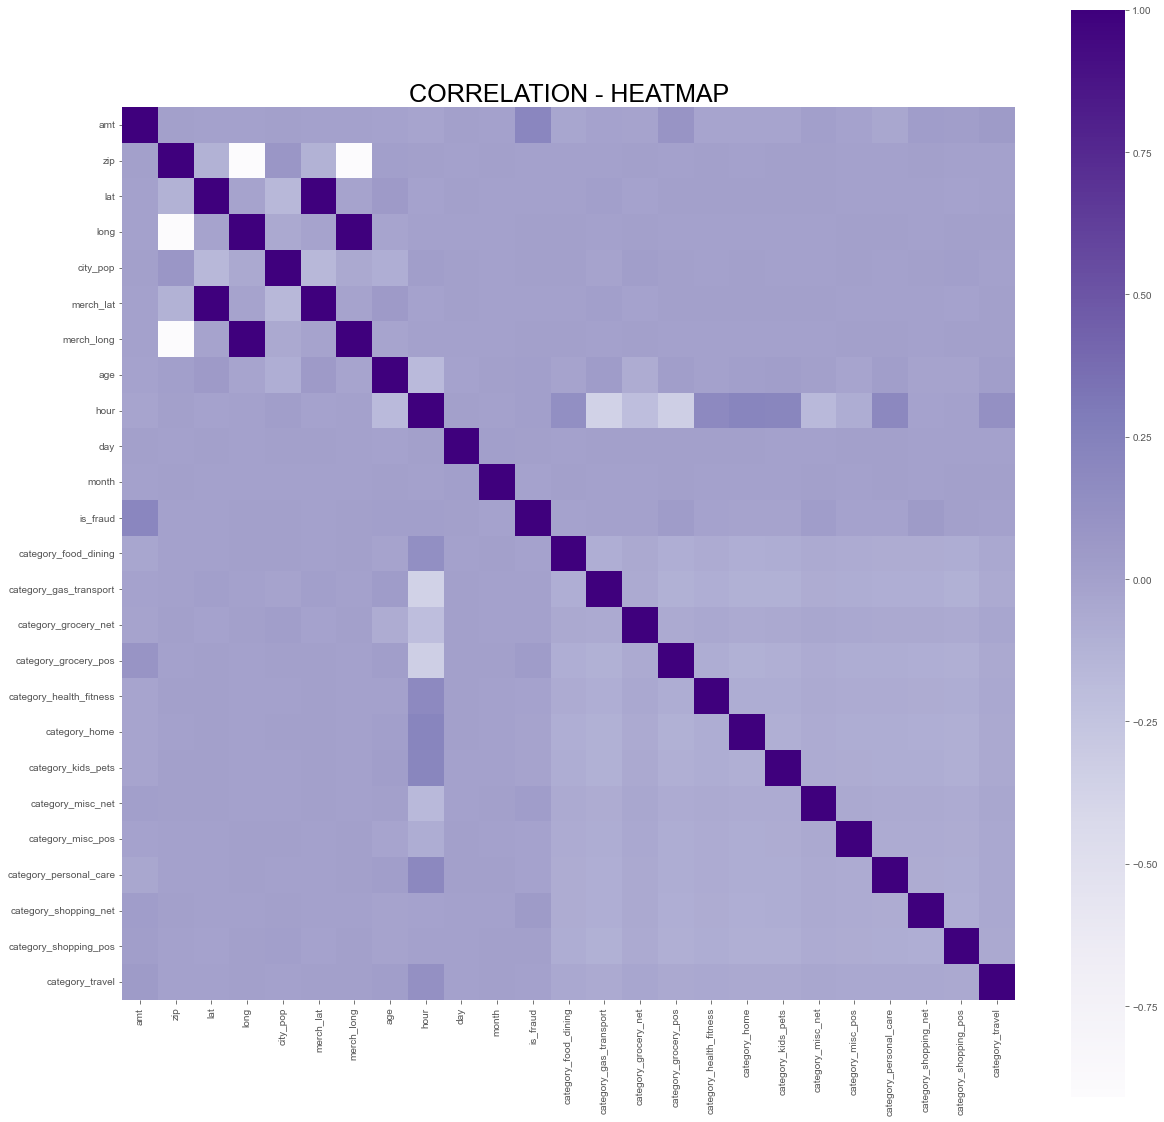

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(fraud.corr(), square=True, cmap='Purples')
sns.set(font_scale=1.5)
plt.rc('font', family='Times New Roman', size=10)
plt.title('CORRELATION - HEATMAP',fontsize=25)
plt.show()

## <CENTER><U> 6. EXPORT DATA</CENTER></U>

In [18]:
fraud.to_csv('Data_Processing/FraudData_ValidationSet.csv')